## 1. Objetivo do Projeto

    Este notebook tem como objetivo construir modelos preditivos para identificar clientes com maior propensão ao cancelamento de serviços (churn). A antecipação desse comportamento permitirá estratégias mais eficazes de retenção.

## 2. Entendimento e Pré-processamento dos Dados

    Nesta etapa, analisamos a estrutura do dataset, verificamos valores ausentes e realizamos uma análise estatística descritiva inicial.

## 2.1 Verificando a Estrutura Geral do Dataset

In [1]:
# Importando bibliotecas necessárias
import pandas as pd

# Carregando o dataset
df = pd.read_csv('TelecomX_Churn-master.csv')
# Exibindo as primeiras linhas do dataset
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1.0,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1.0,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


## 2.2 Informações Básicas Sobre o Dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   float64
 1   customer.gender                                7267 non-null   int64  
 2   customer.SeniorCitizen                         7267 non-null   int64  
 3   customer.Partner                               7267 non-null   int64  
 4   customer.Dependents                            7267 non-null   int64  
 5   customer.tenure                                7267 non-null   int64  
 6   phone.PhoneService                             7267 non-null   int64  
 7   account.PaperlessBilling                       7267 non-null   int64  
 8   account.Charges.Monthly                        7267 non-null   float64
 9   account.Charges.Total                          7267 

Isso nos mostra o número de colunas, tipos de dados e se há colunas com valores ausentes.

## 2.3 Verificando Valores Ausentes

In [3]:
# Contagem de valores ausentes
df.isnull().sum()

Churn                                            224
customer.gender                                    0
customer.SeniorCitizen                             0
customer.Partner                                   0
customer.Dependents                                0
customer.tenure                                    0
phone.PhoneService                                 0
account.PaperlessBilling                           0
account.Charges.Monthly                            0
account.Charges.Total                              0
phone.MultipleLines_No phone service               0
phone.MultipleLines_Yes                            0
internet.InternetService_Fiber optic               0
internet.InternetService_No                        0
internet.OnlineSecurity_No internet service        0
internet.OnlineSecurity_Yes                        0
internet.OnlineBackup_No internet service          0
internet.OnlineBackup_Yes                          0
internet.DeviceProtection_No internet service 

Aqui identificamos que a variável Churn possui 224 valores nulos, o que precisa ser tratado, já que é a variável-alvo da modelagem.

## 2.4 Estatísticas Descritivas das Colunas Numéricas

In [4]:
# Estatísticas para variáveis numéricas
df.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2279.287581
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2267.178963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


Esta análise ajuda a identificar valores extremos, distribuições e faixas de variáveis importantes como tenure, Charges.Monthly e Charges.Total.

## 2.5 Visualização da Distribuição da Variável-Alvo Churn

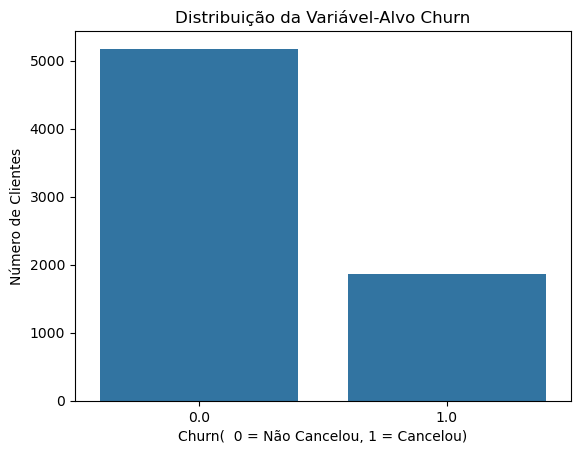

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de contagem de valores para a variável-alvo 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Distribuição da Variável-Alvo Churn')
plt.xlabel('Churn(  0 = Não Cancelou, 1 = Cancelou)')
plt.ylabel('Número de Clientes')
plt.show()

## 2.6 Tratamento de Valores Ausentes

Como a variável Churn é a variável-alvo, não devemos imputar seus valores — o mais apropriado é remover os registros onde ela está ausente.

### Removendo Registros com Churn Nulo


In [6]:
# Remover registros onde 'Churn' é nulo
df = df[df['Churn'].notnull()]

# Verificando se os valores nulos foram removidos
print("Total de registros após remoção:", df.shape[0])


Total de registros após remoção: 7043


## 2.7 Normalização das Variáveis Numéricas

As colunas account.Charges.Monthly, account.Charges.Total, e customer.tenure possuem escalas diferentes e devem ser normalizadas antes da modelagem (especialmente para modelos baseados em distância como KNN ou SVM).

### Aplicando Normalização Min-Max

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# lista de colunas numéricas a serem normalizadas
colunas_normalizar = ['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure']
# Inicializando o MinMaxScaler
scaler = MinMaxScaler() 
# Aplicando a normalização
df[colunas_normalizar] = scaler.fit_transform(df[colunas_normalizar])


## 2.8 Visualização da Normalização das Variáveis Numéricas

Nesta etapa, comparamos as distribuições antes e depois da normalização das variáveis contínuas. Isso ajuda a validar se o escalonamento foi feito corretamente.

### Aplicação da Normalização e Visualização


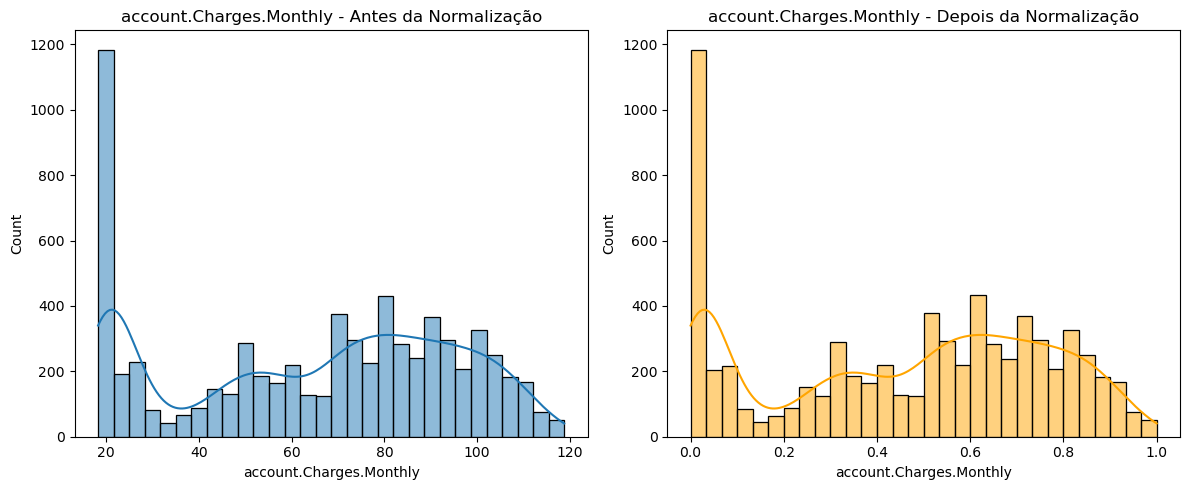

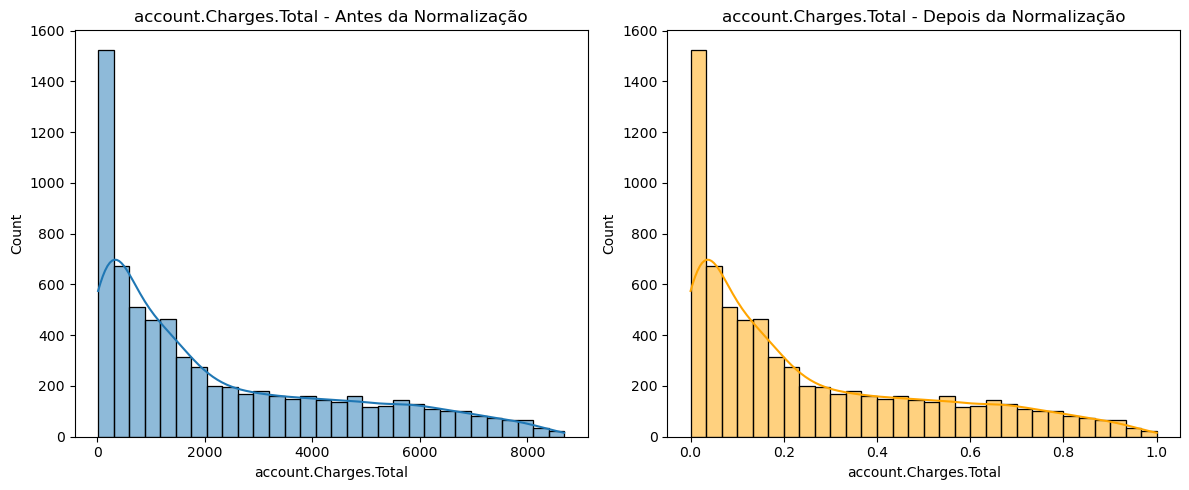

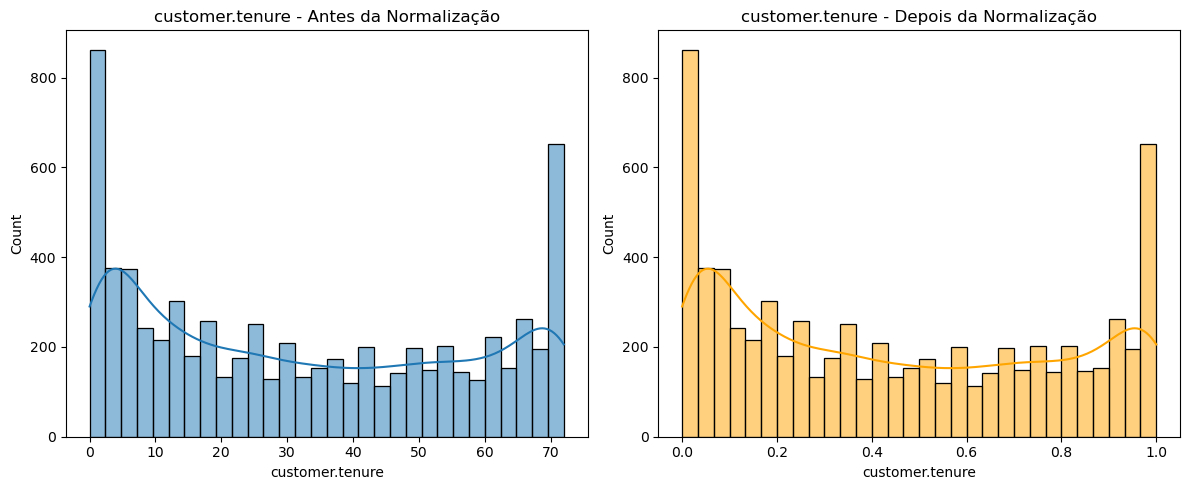

In [9]:
# Reimportando bibliotecas (caso execute essa célula isoladamente)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Carregando o dataset
df_original = pd.read_csv("TelecomX_Churn-master.csv")

# Remover registros com Churn nulo
df_original = df_original[df_original['Churn'].notnull()]
df = df_original.copy()

# Colunas a serem normalizadas
colunas = ['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure']

# Aplicando Min-Max Normalization
scaler = MinMaxScaler()
df[colunas] = scaler.fit_transform(df[colunas])

# Visualizando antes e depois da normalização
for col in colunas:
    plt.figure(figsize=(12, 5))

    # Antes da normalização
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[col], kde=True, bins=30)
    plt.title(f'{col} - Antes da Normalização')

    # Depois da normalização
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f'{col} - Depois da Normalização')

    plt.tight_layout()
    plt.show()


## Conclusão sobre a Normalização das Variáveis Numéricas

A comparação visual entre os gráficos de antes e depois da normalização demonstra que as variáveis numéricas (`customer.tenure`, `account.Charges.Monthly`, `account.Charges.Total`) passaram a ter a mesma escala, variando de 0 a 1, sem alterar suas distribuições originais. 

Essa transformação é fundamental porque:
- **Uniformiza a escala dos dados**, prevenindo que variáveis com valores maiores exerçam influência desproporcional nos modelos.
- **Preserva o formato da distribuição**, garantindo que a informação estatística de cada variável não é distorcida.
- **Prepara os dados para algoritmos sensíveis à escala** (como KNN, SVM e redes neurais), melhorando desempenho e interpretabilidade dos resultados.

Com isso, garantimos que o pré-processamento dos dados foi realizado de maneira correta e transparente, deixando o conjunto pronto para as próximas etapas da modelagem.


# 3. Análise de Correlação e Seleção de Variáveis

## 3.1 Cálculo e Visualização da Matriz de Correlação

Nesta etapa:

Calculamos a correlação entre todas as variáveis (numéricas e booleanas)

Visualizamos a matriz para identificar padrões, multicolinearidade e relações fortes com a variável-alvo

Código para calcular e exibir a correlação com Churn

In [10]:
# Selecionando apenas as colunas numéricas e booleanas para análise de correlação
df_corr = df.select_dtypes(include=['float64', 'int64', 'bool'])
# Calculando a matriz de correlação
correlation_matrix = df_corr.corr() 
# Exibindo as maiores correlações com a variável 'Churn'
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(f"Correlação com a variável Churn: {correlation_with_churn}")

Correlação com a variável Churn: Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
account.PaperlessBilling                         0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService                               0.011942
customer.gender                                 -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner                       

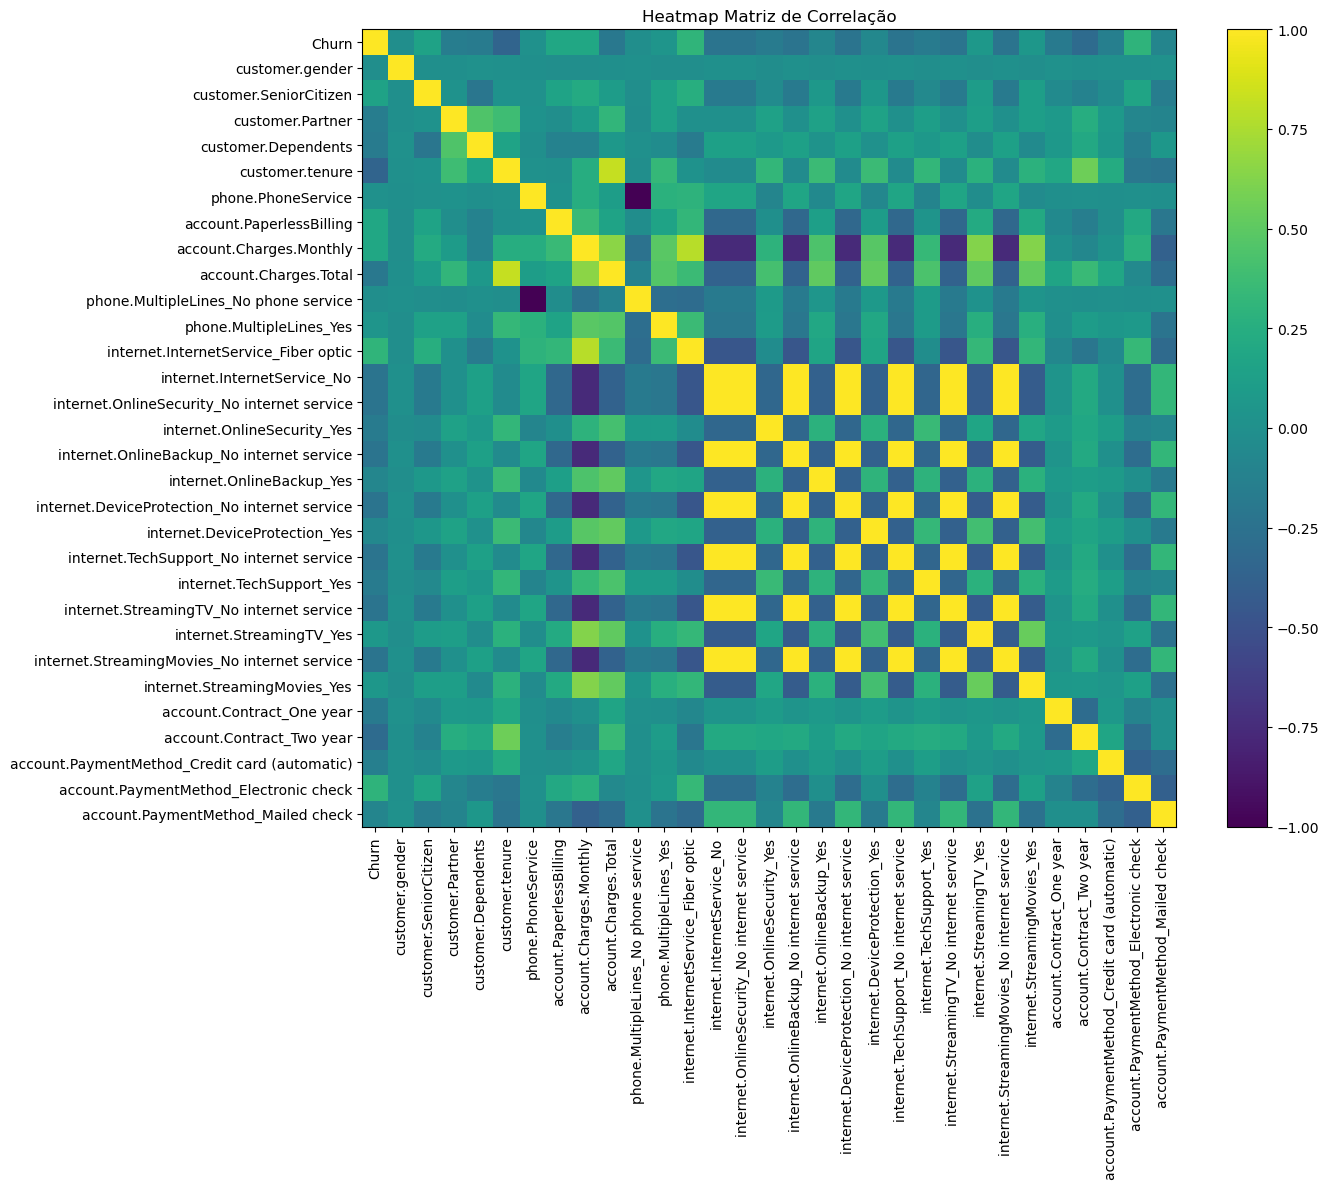

In [12]:
# Código para visualizar a matriz de correlação (heatmap)
plt.figure(figsize=(14,12))
plt.title('Heatmap Matriz de Correlação')
plt.imshow(correlation_matrix, aspect='auto', interpolation='nearest')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.tight_layout()
# --- IGNORE ---
plt.show()

### Conclusão do Heatmap de Correlação

A análise do heatmap de correlação revelou alguns fatores diretamente ligados ao churn dos clientes:

- **Serviço de fibra óptica** e **pagamento por débito eletrônico** apresentam as correlações positivas mais altas com o churn (`0.31` e `0.30` respectivamente), indicando que clientes com essas características têm maior tendência de evasão.
- **Cobrança mensal** e **adesão ao faturamento sem papel** também estão associadas ao aumento do churn, assim como o fato de ser um cliente idoso.
- Por outro lado, variáveis como **contrato de dois anos** (`-0.30`) e **maior tempo de permanência (tenure)** (`-0.35`) apresentam correlação negativa, mostrando que contratos longos e clientes mais antigos tendem a permanecer.
- Variáveis ligadas à ausência de serviços (ex: sem suporte técnico ou streaming) também apresentam correlação negativa moderada.

Esses achados reforçam que aspectos contratuais, formas de pagamento e o perfil de permanência são determinantes para prever a evasão. Esses fatores serão priorizados na etapa de seleção de variáveis para modelagem preditiva.
 

# 4. Seleção de Variáveis para Modelagem

Agora que sabemos quais variáveis têm maior relação com o churn, precisamos selecionar um conjunto de features relevante e evitar redundâncias ou multicolinearidades.

**Passos da Seleção de Variáveis**

    1. Selecionar variáveis fortemente correlacionadas com o churn (positiva e negativamente).

    2. Verificar se há pares de variáveis muito correlacionadas entre si para evitar redundância.

    3. Montar o conjunto de dados final para modelagem.



## 4.1 Seleção das Principais Features

In [13]:
# Definição de um limiar de correlação (exemplo: abs(correlation) > 0.10)
correlation_with_churn = df.corr(numeric_only=True)['Churn'].abs().sort_values(ascending=False)
limiar = 0.10
features_relevantes = correlation_with_churn[correlation_with_churn > limiar].index.tolist()
features_relevantes.remove('Churn')  # Remover a variável alvo da lista de features
print(f"Features selecionadas para modelagem: {features_relevantes}")

Features selecionadas para modelagem: ['customer.tenure', 'internet.InternetService_Fiber optic', 'account.Contract_Two year', 'account.PaymentMethod_Electronic check', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.DeviceProtection_No internet service', 'internet.TechSupport_No internet service', 'internet.StreamingMovies_No internet service', 'internet.StreamingTV_No internet service', 'internet.OnlineBackup_No internet service', 'account.Charges.Total', 'account.Charges.Monthly', 'account.PaperlessBilling', 'account.Contract_One year', 'internet.OnlineSecurity_Yes', 'internet.TechSupport_Yes', 'customer.Dependents', 'customer.SeniorCitizen', 'customer.Partner', 'account.PaymentMethod_Credit card (automatic)']


## 4.2 Checando multicolinearidade entre as selecionadas

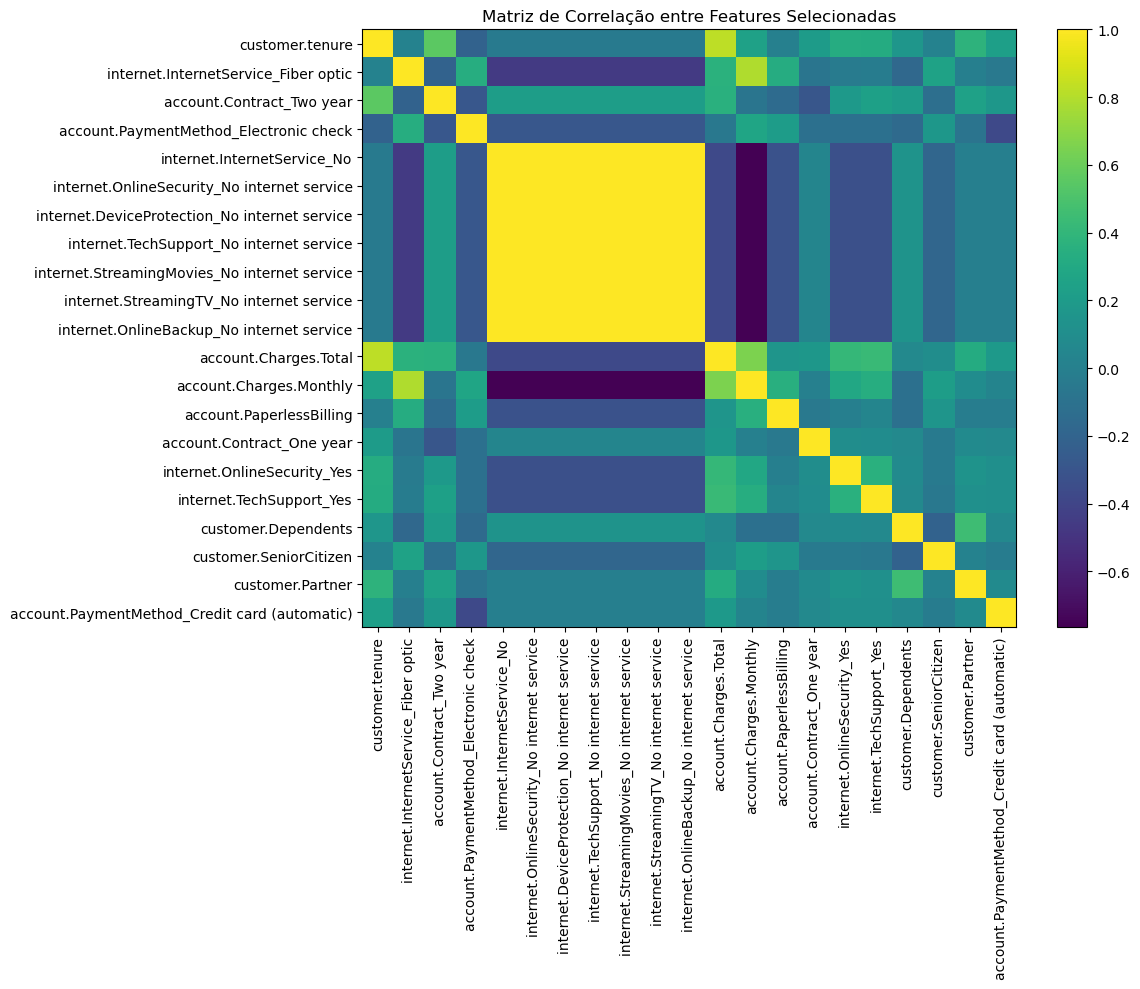

In [14]:
## Visualizar matriz de correlação apenas entre features selecionadas
corr_selected = df[features_relevantes].corr()
plt.figure(figsize=(12, 10))
plt.title('Matriz de Correlação entre Features Selecionadas')
plt.imshow(corr_selected, aspect='auto', interpolation='nearest')
plt.xticks(range(len(corr_selected.columns)), corr_selected.columns, rotation=90)   
plt.yticks(range(len(corr_selected.columns)), corr_selected.columns)
plt.colorbar()
plt.tight_layout()
# --- IGNORE ---
plt.show()


## 4.3 Conclusão

O heatmap confirma que as variáveis escolhidas para a modelagem possuem baixa redundância entre si, garantindo um conjunto de features robusto para a etapa de classificação. Assim, evitamos problemas de multicolinearidade e maximizamos a capacidade preditiva dos modelos.

## Resumo das Etapas Realizadas até o Momento

1. **Análise exploratória inicial:**  
   - Inspeção da estrutura do dataset e identificação de valores ausentes.
   - Remoção de registros com `Churn` nulo para garantir a qualidade do alvo.
   - Estatísticas descritivas das variáveis numéricas.

2. **Pré-processamento:**  
   - Normalização das variáveis contínuas (`tenure`, `Charges.Monthly`, `Charges.Total`) para faixa entre 0 e 1.
   - Geração de gráficos comparativos antes e depois da normalização para validação visual.

3. **Análise de correlação:**  
   - Cálculo da matriz de correlação entre variáveis e com a variável-alvo `Churn`.
   - Visualização do heatmap da matriz de correlação.
   - Identificação dos principais fatores associados ao churn (contrato, forma de pagamento, serviços utilizados, tempo de permanência).

4. **Seleção de variáveis para modelagem:**  
   - Definição de um limiar de correlação absoluta (|corr| > 0.10) para selecionar as features mais relevantes.
   - Listagem das variáveis selecionadas que servirão como base para os modelos preditivos.

---

Próxima etapa: análise de correlação entre as features selecionadas para evitar redundâncias e preparar o conjunto final para a modelagem.


## 5. Modelagem Preditiva e Avaliação

Etapas:

1. Divisão dos dados em treino e teste.

2. Treinamento de ao menos dois modelos de classificação (exemplo: Regressão Logística e Random Forest).

3. Avaliação do desempenho dos modelos com métricas apropriadas.

4. Interpretação dos resultados e importâncias das variáveis.

## 5.1 Divisão dos Dados

In [15]:
from sklearn.model_selection import train_test_split

# Definindo X e y
X = df[features_relevantes]
y = df['Churn']

# Dividindo os dados em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 5.2 Treinamento dos Modelos

In [18]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression 
# Inicializando o modelo
lr = LogisticRegression(max_iter=1000)
# Treinando o modelo
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

# Inicializando o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Treinando o modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5.3 Avaliação dos Modelos

Vamos usar métricas como acurácia, precisão, recall, F1-score e AUC-ROC.

In [21]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Previsões

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Classificação Relatório
print("Relatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_lr)) 

# AUC-ROC
y_proba_lr = lr.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
print("AUC-ROC - Regressão Logística:", roc_auc_score(y_test, y_proba_lr))
print("AUC-ROC - Random Forest:", roc_auc_score(y_test, y_proba_rf))


Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1552
         1.0       0.62      0.53      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

AUC-ROC - Regressão Logística: 0.8357521546575518
AUC-ROC - Random Forest: 0.8147155300733226


## Resultados dos Modelos

**Regressão Logística**

- Acurácia: 0.79

- AUC-ROC: 0.84

- F1-score para churn: 0.57

- Recall para churn: 0.53

**Random Forest**

- Acurácia: 0.78

- AUC-ROC: 0.81

- F1-score para churn: 0.54

- Recall para churn: 0.50

##### **Conclusões**


- Ambos os modelos apresentam bom desempenho geral, com a Regressão Logística ligeiramente superior, especialmente em AUC-ROC.

- O recall (capacidade de encontrar clientes que de fato cancelam) é moderado, o que é esperado em datasets desbalanceados.

- O modelo de Regressão Logística entrega o melhor equilíbrio para identificação de churn, mas ambos são viáveis para análise de variáveis importantes.


 ## 5.4 Importância das Variáveis no Random Forest

 Após treinar o modelo Random Forest, é fundamental analisar quais variáveis mais influenciam a decisão do modelo. Assim, conseguimos identificar os principais fatores de evasão e embasar ações de retenção.

### Cálculo e Visualização da Importância das Variáveis

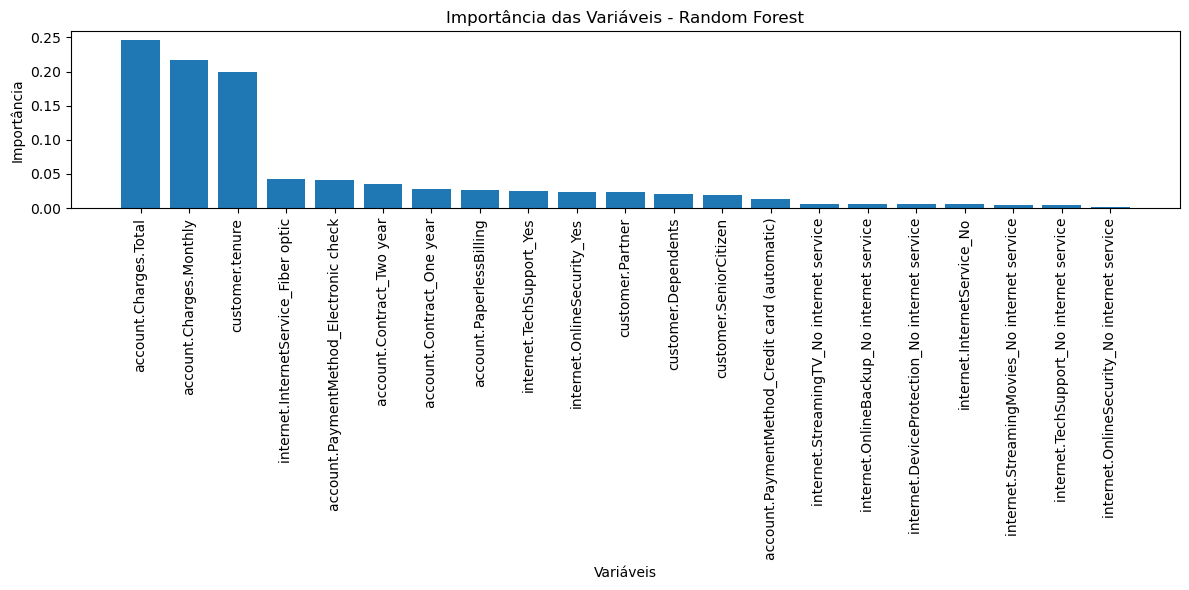

In [22]:
import numpy as np

# Obter a importância das variáveis a partir do modelo Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = np.array(features_relevantes)[indices]

# Visualar a importância das variáveis em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.title('Importância das Variáveis - Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features_sorted, rotation=90)
plt.xlabel('Variáveis') 
plt.ylabel('Importância')
plt.tight_layout()
plt.show()




### Conclusão sobre a Importância das Variáveis

A análise do modelo Random Forest revela que as variáveis com maior importância para prever churn são principalmente:

- Tempo de permanência do cliente (`customer.tenure`)
- Valor mensal pago (`account.Charges.Monthly`)
- Características do contrato (tipo e duração)
- Utilização de serviços como fibra óptica e cobrança eletrônica

Esses fatores indicam que clientes novos, com contratos mais flexíveis e pagamento eletrônico estão mais propensos ao cancelamento. Com isso, a empresa pode direcionar ações específicas para clientes com esses perfis, criando ofertas, benefícios ou contatos preventivos para reduzir a evasão.
